# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [80]:
from util import Analyser
LOG_PATH_ROOT="../../../ssbm/"
analyser = Analyser(LOG_PATH_ROOT + "i7-8core.log")

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [81]:
print(analyser.get_repetitions())

250


CPU: Intel i7 4.2ghz

CPU Kerne: 6

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachted.

In [82]:
benchmark = analyser.get_row_benchmark()
benchmark.print_stats()

|Samples|250|
|--|--|
|Average|3591003|
|Min|3451791|
|Max|4079505|
|Median|3577376|
|Standard Deviation|79002|
|Total|897750831|


## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [83]:
benchmark = analyser.get_column_benchmark()
benchmark.print_stats()

|Samples|250|
|--|--|
|Average|754689|
|Min|725710|
|Max|858595|
|Median|752236|
|Standard Deviation|17619|
|Total|188672342|


### Vergleich Zeilenbasiert vs. Spaltenbasiert

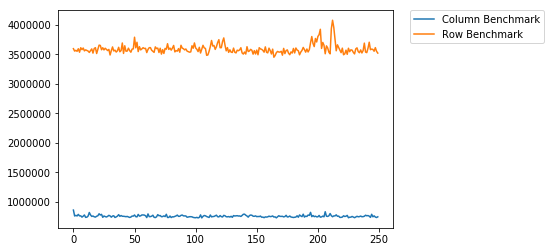

In [84]:
from util import Comparison

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.compare_visually()

In [85]:
comparison.compare_raw()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Median|752236|3577376|
|Max|858595|4079505|
|Total|188672342|897750831|
|Samples|250|250|
|Standard Deviation|17619|79002|
|Min|725710|3451791|
|Average|754689|3591003|


In [86]:
comparison.compare()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Median|0.0|1.0|
|Max|0.0|1.0|
|Total|0.0|1.0|
|Samples|250|250|
|Standard Deviation|0.0|1.0|
|Min|0.0|1.0|
|Average|0.0|1.0|


### Stabilität des Benchmarks

#### Spaltenbasiert

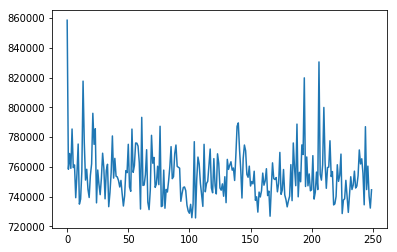

In [87]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

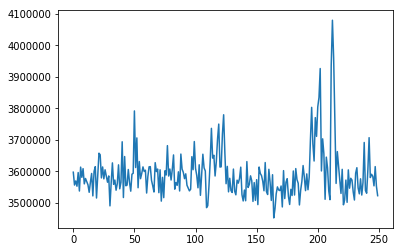

In [88]:
benchmark = analyser.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachted.

### Spaltenbasiert

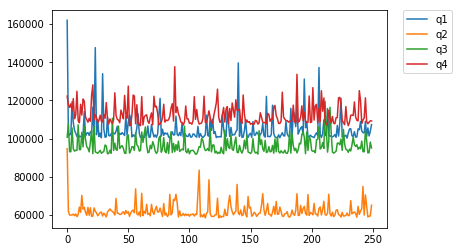

In [89]:
from util import display_table
import re

benchmark = analyser.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

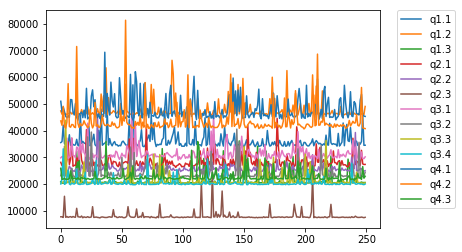

In [90]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

In [91]:
comparison.compare_raw()

||q1.1|q1.2|q1.3|q2.1|q2.2|q2.3|q3.1|q3.2|q3.3|q3.4|q4.1|q4.2|q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Median|34996|46436|20500|27604|25476|7594|30592|23066|20460|19982|45960|42007|22046|
|Max|57088|81246|36135|44536|46123|24401|47372|40524|43880|33156|69286|68584|35884|
|Total|9028365|11963752|5325278|7148796|6475987|2021468|7837166|6024671|5337423|5147822|11974153|10813089|5695104|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Standard Deviation|3127|4186|2534|2963|1912|1984|2551|2888|2718|1868|4247|3932|2172|
|Min|33899|45787|20259|26213|24577|7327|28944|22549|20156|19733|43888|40603|21537|
|Average|36113|47855|21301|28595|25904|8086|31349|24099|21350|20591|47897|43252|22780|


In [92]:
comparison.compare()

||q1.1|q1.2|q1.3|q2.1|q2.2|q2.3|q3.1|q3.2|q3.3|q3.4|q4.1|q4.2|q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Median|0.71|1.0|0.33|0.52|0.46|0.0|0.59|0.4|0.33|0.32|0.99|0.89|0.37|
|Max|0.58|1.0|0.21|0.35|0.38|0.0|0.4|0.28|0.34|0.15|0.79|0.78|0.2|
|Total|0.7|1.0|0.33|0.52|0.45|0.0|0.58|0.4|0.33|0.31|1.0|0.88|0.37|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Standard Deviation|0.53|0.97|0.28|0.46|0.02|0.05|0.29|0.43|0.36|0.0|1.0|0.87|0.13|
|Min|0.69|1.0|0.34|0.49|0.45|0.0|0.56|0.4|0.33|0.32|0.95|0.87|0.37|
|Average|0.7|1.0|0.33|0.52|0.45|0.0|0.58|0.4|0.33|0.31|1.0|0.88|0.37|


## Zeilenbasiert

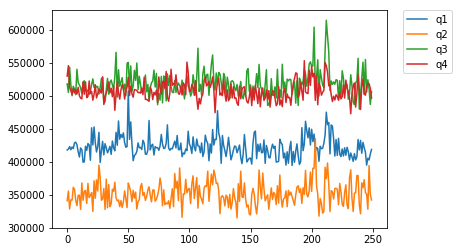

In [93]:
benchmark = analyser.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.compare_visually()

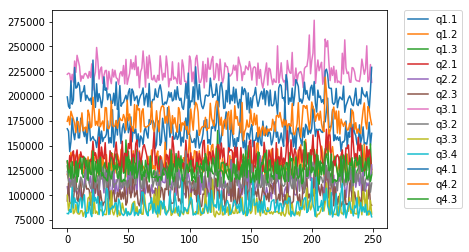

In [94]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.compare_visually()

In [95]:
comparison.compare_raw()

||q1.1|q1.2|q1.3|q2.1|q2.2|q2.3|q3.1|q3.2|q3.3|q3.4|q4.1|q4.2|q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Median|161888|131894|125336|138174|109682|100577|222940|114905|83598|87054|198582|172822|123596|
|Max|200188|160236|165302|168149|143345|133401|276308|144729|115824|120817|236164|218992|154453|
|Total|40695371|33236108|31729341|34644077|27642650|25475437|56132759|29045657|21639788|22252775|50067481|43774250|31311011|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Standard Deviation|10869|9413|9287|10540|9761|9902|10780|8302|7538|8247|9388|9989|9274|
|Min|141190|115552|109351|118654|96322|88131|205994|102132|78115|77222|181320|154904|108926|
|Average|162781|132944|126917|138576|110571|101902|224531|116183|86559|89011|200270|175097|125244|


In [96]:
comparison.compare()

||q1.1|q1.2|q1.3|q2.1|q2.2|q2.3|q3.1|q3.2|q3.3|q3.4|q4.1|q4.2|q4.3|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Median|0.56|0.35|0.3|0.39|0.19|0.12|1.0|0.22|0.0|0.02|0.83|0.64|0.29|
|Max|0.53|0.28|0.31|0.33|0.17|0.11|1.0|0.18|0.0|0.03|0.75|0.64|0.24|
|Total|0.55|0.34|0.29|0.38|0.17|0.11|1.0|0.21|0.0|0.02|0.82|0.64|0.28|
|Samples|250|250|250|250|250|250|250|250|250|250|250|250|250|
|Standard Deviation|1.0|0.56|0.53|0.9|0.67|0.71|0.97|0.23|0.0|0.21|0.56|0.74|0.52|
|Min|0.5|0.3|0.25|0.32|0.15|0.08|1.0|0.19|0.01|0.0|0.81|0.6|0.25|
|Average|0.55|0.34|0.29|0.38|0.17|0.11|1.0|0.21|0.0|0.02|0.82|0.64|0.28|


## Indizes

### Vergleich von allen Messwerten

In [97]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark, row_benchmark, index_row_benchmark)

comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Median|752236|573595|3577376|3021074|
|Max|858595|697310|4079505|3286420|
|Total|188672342|144605464|897750831|757401823|
|Samples|250|250|250|250|
|Standard Deviation|17619|18647|79002|52243|
|Min|725710|545902|3451791|2933238|
|Average|754689|578422|3591003|3029607|


In [98]:
comparison.compare()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Median|0.06|0.0|1.0|0.81|
|Max|0.05|0.0|1.0|0.77|
|Total|0.06|0.0|1.0|0.81|
|Samples|250|250|250|250|
|Standard Deviation|0.0|0.02|1.0|0.56|
|Min|0.06|0.0|1.0|0.82|
|Average|0.06|0.0|1.0|0.81|


### Spaltenbasiert

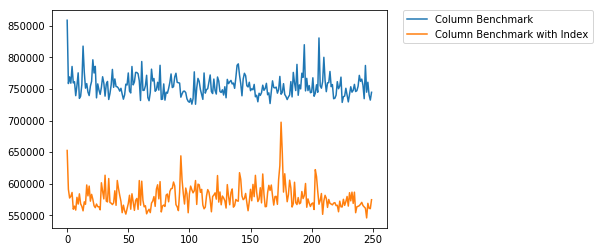

In [99]:
column_benchmark = analyser.get_column_benchmark()
index_column_benchmark = analyser.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.compare_visually()

In [100]:
comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|
|--|--|--|
|Median|752236|573595|
|Max|858595|697310|
|Total|188672342|144605464|
|Samples|250|250|
|Standard Deviation|17619|18647|
|Min|725710|545902|
|Average|754689|578422|


### Zeilenbasiert

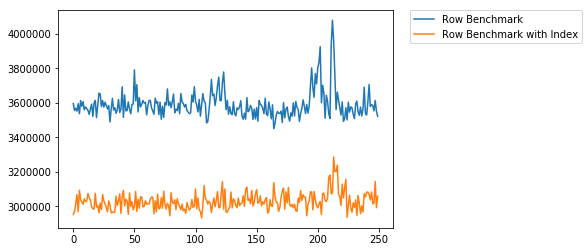

In [101]:
row_benchmark = analyser.get_row_benchmark()
index_row_benchmark = analyser.get_row_benchmark_I()
comparison = Comparison(row_benchmark, index_row_benchmark)

comparison.compare_visually()

In [102]:
comparison.compare_raw()

||Row Benchmark|Row Benchmark with Index|
|--|--|--|
|Median|3577376|3021074|
|Max|4079505|3286420|
|Total|897750831|757401823|
|Samples|250|250|
|Standard Deviation|79002|52243|
|Min|3451791|2933238|
|Average|3591003|3029607|


## Hardware Vergleich

### Einstellungen

In [103]:
a8 = Analyser(LOG_PATH_ROOT + "i7-8core.log")
a4 = Analyser(LOG_PATH_ROOT + "i7-4core.log")
a2 = Analyser(LOG_PATH_ROOT + "i7-2core.log")

### Spaltenbasiert

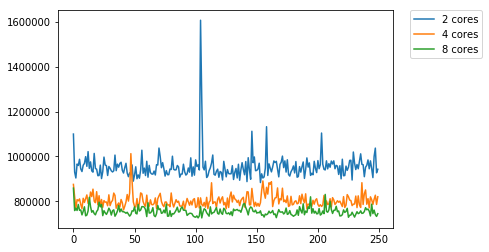

In [104]:
b8 = a8.get_column_benchmark()
b4 = a4.get_column_benchmark()
b2 = a2.get_column_benchmark()

b8.set_name("8 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b8)
comparison.compare_visually()

In [105]:
comparison.compare_raw()

||2 cores|4 cores|8 cores|
|--|--|--|--|
|Median|945048|796784|752236|
|Max|1607694|1012496|858595|
|Total|238283078|200795162|188672342|
|Samples|250|250|250|
|Standard Deviation|58230|28873|17619|
|Min|883485|761425|725710|
|Average|953132|803181|754689|


### Zeilenbasiert

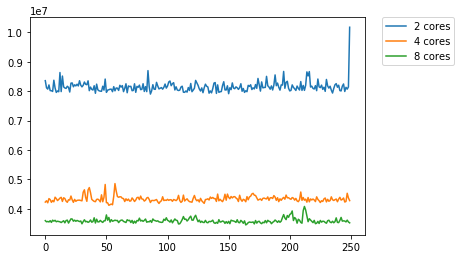

In [106]:
b8 = a8.get_row_benchmark()
b4 = a4.get_row_benchmark()
b2 = a2.get_row_benchmark()

b8.set_name("8 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b8)
comparison.compare_visually()

In [107]:
comparison.compare_raw()

||2 cores|4 cores|8 cores|
|--|--|--|--|
|Median|8121576|4317812|3577376|
|Max|10169894|4856142|4079505|
|Total|2036257355|1082755311|897750831|
|Samples|250|250|250|
|Standard Deviation|190911|97686|79002|
|Min|7898365|4118623|3451791|
|Average|8145029|4331021|3591003|
